<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Housing_Prices_Prediction_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Prediction Competition
Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
https://www.kaggle.com/competitions/home-data-for-ml-course/overview

- File descriptions
  - train.csv - the training set
  - test.csv - the test set
  - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
  - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

# Exploring Data

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset
X_full = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

In [116]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
X_full.shape

(1460, 80)

In [118]:
X_full.isna().sum().sum()

6965

## Col Dtypes

In [119]:
numeric_cols = X_full.select_dtypes(exclude=['object'])
cat_cols = X_full.select_dtypes(include=['object'])

## Visualizing Categorical Variables

In [120]:
categorical_cols = cat_cols.columns

In [121]:
def isnull(cols):
  total = 0
  for column in cols:
    nans = X_full[column].isna().sum()
    total += nans
    if nans > 0:
      print(column + " - " + str(nans))
  print("Total missing: "+ str(total))

In [122]:
isnull(list(categorical_cols))

Alley - 1369
MasVnrType - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
FireplaceQu - 690
GarageType - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PoolQC - 1453
Fence - 1179
MiscFeature - 1406
Total missing: 6617


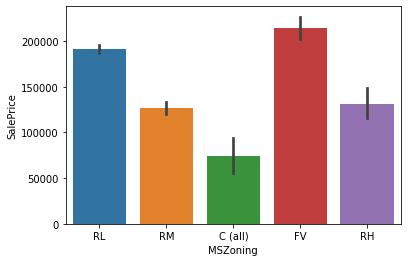

In [123]:
sns.barplot(x='MSZoning', y='SalePrice', data=X_full)
plt.show()

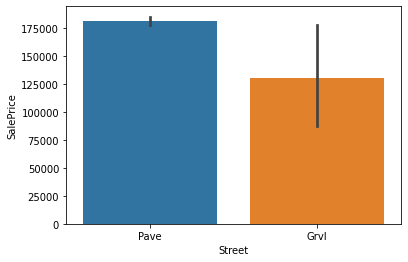

In [124]:
sns.barplot(x='Street', y='SalePrice', data=X_full)
plt.show()

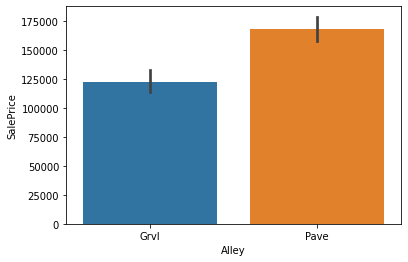

In [125]:
sns.barplot(x='Alley', y='SalePrice', data=X_full)
plt.show()

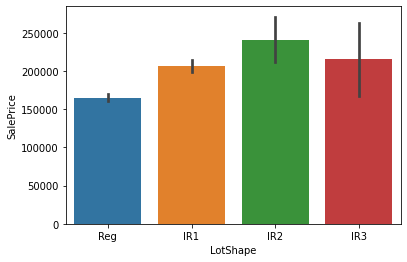

In [126]:
sns.barplot(x='LotShape', y='SalePrice', data=X_full)
plt.show()

# Feature Engineering

Encoding object as an enumerated type or categorical variable.

In [127]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_full.copy()
label_X_valid = X_test_full.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

label_X_train[categorical_cols] = ordinal_encoder.fit_transform(X_full[categorical_cols])
label_X_valid[categorical_cols] = ordinal_encoder.transform(X_test_full[categorical_cols])

# Transform missing values to -1
label_X_train[categorical_cols] = label_X_train[categorical_cols].fillna(-1)
label_X_valid[categorical_cols] = label_X_valid[categorical_cols].fillna(-1)

In [128]:
# Feature Factorization

# X_full[categorical_cols] = X_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])
# X_test_full[categorical_cols] = X_test_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])

In [129]:
label_X_train.shape

(1460, 80)

In [130]:
label_X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3.0,65.0,8450,1.0,-1.0,3.0,3.0,0.0,4.0,...,0,-1.0,-1.0,-1.0,0,2,2008,8.0,4.0,208500
2,20,3.0,80.0,9600,1.0,-1.0,3.0,3.0,0.0,2.0,...,0,-1.0,-1.0,-1.0,0,5,2007,8.0,4.0,181500
3,60,3.0,68.0,11250,1.0,-1.0,0.0,3.0,0.0,4.0,...,0,-1.0,-1.0,-1.0,0,9,2008,8.0,4.0,223500
4,70,3.0,60.0,9550,1.0,-1.0,0.0,3.0,0.0,0.0,...,0,-1.0,-1.0,-1.0,0,2,2006,8.0,0.0,140000
5,60,3.0,84.0,14260,1.0,-1.0,0.0,3.0,0.0,2.0,...,0,-1.0,-1.0,-1.0,0,12,2008,8.0,4.0,250000


In [131]:
missing_cat = (label_X_train[categorical_cols].isna().sum())
missing_cat[missing_cat > 0]

Series([], dtype: int64)

In [132]:
# Missing
label_X_train[categorical_cols].isna().sum().sum()

0

# Data Splitting

In [133]:
# Remove rows with missing target, separate target from predictors
label_X_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = label_X_train.SalePrice
label_X_train.drop(['SalePrice'], axis=1, inplace=True)

In [134]:
label_X_train.isna().sum().sum()

348

In [135]:
X = label_X_train
X_test = label_X_valid

# Data Splitting (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preliminary Investigation

In [136]:
X_train.shape

(1168, 79)

In [137]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,3.0,90.0,11694,1.0,-1.0,3.0,3.0,0.0,4.0,...,260,0,-1.0,-1.0,-1.0,0,7,2007,6.0,5.0
871,20,3.0,60.0,6600,1.0,-1.0,3.0,3.0,0.0,4.0,...,0,0,-1.0,-1.0,-1.0,0,8,2009,8.0,4.0
93,30,3.0,80.0,13360,1.0,0.0,0.0,1.0,0.0,4.0,...,0,0,-1.0,-1.0,-1.0,0,8,2009,8.0,4.0
818,20,3.0,NaN,13265,1.0,-1.0,0.0,3.0,0.0,1.0,...,0,0,-1.0,-1.0,-1.0,0,7,2008,8.0,4.0
303,20,3.0,118.0,13704,1.0,-1.0,0.0,3.0,0.0,0.0,...,0,0,-1.0,-1.0,-1.0,0,1,2006,8.0,4.0


In [144]:
missing = (X_train.isnull().sum())
missing[missing > 0]

LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
  model = RandomForestRegressor(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  return mean_absolute_error(y_valid, predictions)

## Drop columns with missing values
In this step, you'll preprocess the data in X_train and X_valid to remove columns with missing values. Set the preprocessed DataFrames to reduced_X_train and reduced_X_valid, respectively.

In [150]:
# get names of columns with missing values
cols_missing = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

# drop columns in training and validation data
reduced_X_train = X_train.drop(cols_missing, axis=1)
reduced_X_valid = X_test.drop(cols_missing, axis=1)

# Imputation

In [149]:
from sklearn.impute import SimpleImputer

# imputation
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_test))


# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

In [151]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_test))

MAE (Drop columns with missing values):
16782.44184931507


In [152]:
print("MAE (Imputed values):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (Imputed values):
17169.14455479452


Feature Factorization
- MAE (Drop columns with missing values): 16782.44184931507
- MAE (Imputed values): 17169.14455479452